### Multilinear Regression Using NumPy and SciPy

We fit a model of the form:

$$
y = a_0 + a_1 x_1 + a_2 x_2
$$

This example uses least squares regression to estimate the coefficients $a_0$, $a_1$, and $a_2$ from experimental data. We also plot:

- The predicted vs actual values of $y$
- The residuals (difference between observed and predicted $y$)

#### Data

| $y$ | $x_1$ | $x_2$ |
|-----|------|-------|
| 293 | 1.61 | 851   |
| 230 | 15.5 | 820   |
| 172 | 22.0 | 1058  |
| 91  | 45.0 | 1201  |
| 125 | 33.0 | 1357  |
| 125 | 40.0 | 1115  |

In [1]:
# Load Required Librarie
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t

In [2]:
# Independent variables x1 and x2
x1 = np.array([1.61, 15.5, 22.0, 45.0, 33.0, 40.0])
x2 = np.array([851, 820, 1058, 1201, 1357, 1115])

# Dependent variable y
y = np.array([293, 230, 172, 91, 125, 125])

In [3]:
# Stack x1 and x2 with a column of ones for intercept
X = np.column_stack((np.ones_like(x1), x1, x2))

# Least squares solution: beta = (XᵀX)⁻¹ Xᵀ y
coeffs, residuals, rank, s = np.linalg.lstsq(X, y, rcond=None)
a0, a1, a2 = coeffs

In [4]:
print("Multilinear Regression Coefficients:")
print(f"  a0 (intercept) = {a0:.4f}")
print(f"  a1 (x1 coeff)  = {a1:.4f}")
print(f"  a2 (x2 coeff)  = {a2:.4f}")

Multilinear Regression Coefficients:
  a0 (intercept) = 360.8357
  a1 (x1 coeff)  = -3.7525
  a2 (x2 coeff)  = -0.0843


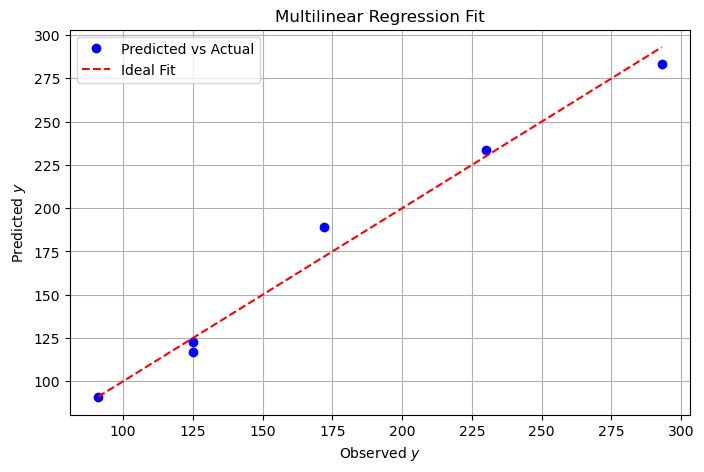

In [5]:
# Predicted y values
y_pred = X @ coeffs

# Plot actual vs predicted
plt.figure(figsize=(8, 5))
plt.plot(y, y_pred, 'o', color='blue', label='Predicted vs Actual')
plt.plot([min(y), max(y)], [min(y), max(y)], 'r--', label='Ideal Fit')
plt.xlabel('Observed $y$')
plt.ylabel('Predicted $y$')
plt.title('Multilinear Regression Fit')
plt.grid(True)
plt.legend()
plt.show()

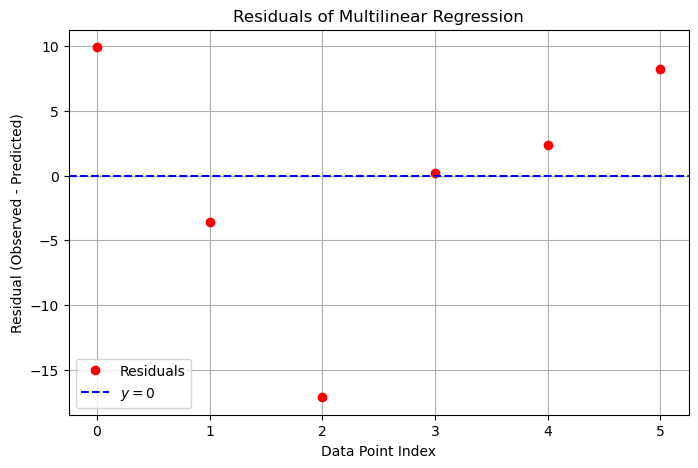

In [6]:
# Residuals
residuals = y - y_pred

# Plot residuals
plt.figure(figsize=(8, 5))
plt.plot(range(len(y)), residuals, 'o', color='red', label='Residuals')
plt.axhline(0, color='blue', linestyle='--', label='$y=0$')
plt.xlabel('Data Point Index')
plt.ylabel('Residual (Observed - Predicted)')
plt.title('Residuals of Multilinear Regression')
plt.grid(True)
plt.legend()
plt.show()